In [1]:
!git clone https://github.com/AnshuLodha007/Unicorn_Hackathon.git

fatal: destination path 'Unicorn_Hackathon' already exists and is not an empty directory.


# Importing the Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from pandas import Series
%matplotlib inline

from sklearn.metrics import mean_squared_error
from math import sqrt
from statistics import mean

import warnings
warnings.filterwarnings("ignore")

In [45]:
# Reading the csv files

#train = pd.read_csv('/Unicorn_Hackathon/Train.csv')
#train = pd.read_csv('/Unicorn_Hackathon/Test.csv')

train = pd.read_csv(rf'C:\Dropbox\GenAI\Analytics_Vidhya\Time_Series_Forecasting_using_Python\Train.csv')
test = pd.read_csv(rf'C:\Dropbox\GenAI\Analytics_Vidhya\Time_Series_Forecasting_using_Python\Test.csv')
train.shape, test.shape

((18288, 3), (5112, 2))

In [46]:
# making copy of orignal data.

train_orignal = train.copy()
test_orignal = test.copy()

In [47]:
train.columns

Index(['ID', 'Datetime', 'Count'], dtype='object')

In [48]:
train.dtypes

ID           int64
Datetime    object
Count        int64
dtype: object

# Feature Extraction

In [49]:
train['Datetime'] = pd.to_datetime(train.Datetime, format = '%d-%m-%Y %H:%M')
test['Datetime'] = pd.to_datetime(test.Datetime, format = '%d-%m-%Y %H:%M')

In [50]:
train_orignal['Datetime'] = pd.to_datetime(train.Datetime, format = '%d-%m-%Y %H:%M')
test_orignal['Datetime'] = pd.to_datetime(test.Datetime, format = '%d-%m-%Y %H:%M')

In [51]:
# Extracting Year, Mont, Date, Day, Hour for each table.

for i in (train, test, train_orignal, test_orignal):
  i['year'] = i.Datetime.dt.year
  i['month'] = i.Datetime.dt.month
  i['day'] = i.Datetime.dt.day
  i['Hour'] = i.Datetime.dt.hour

In [52]:
train.head()

,ID,Datetime,Count,year,month,day,Hour
0,0,2012-08-25 00:00:00,8,2012,8,25,0
1,1,2012-08-25 01:00:00,2,2012,8,25,1
2,2,2012-08-25 02:00:00,6,2012,8,25,2
3,3,2012-08-25 03:00:00,2,2012,8,25,3
4,4,2012-08-25 04:00:00,2,2012,8,25,4


In [53]:
# Extracting 'Day of Week' and 'Is Weekend' for train data, as we are looking forward to see variation wrt weekdays.

train['day of week'] = train['Datetime'].dt.dayofweek
train['weekend'] = train['day of week'].apply(lambda x: 1 if x in [5, 6] else 0)

In [54]:
train.head()

,ID,Datetime,Count,year,month,day,Hour,day of week,weekend
0,0,2012-08-25 00:00:00,8,2012,8,25,0,5,1
1,1,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2,2,2012-08-25 02:00:00,6,2012,8,25,2,5,1
3,3,2012-08-25 03:00:00,2,2012,8,25,3,5,1
4,4,2012-08-25 04:00:00,2,2012,8,25,4,5,1


## Since its a time series based prediction, we try and check our various hypothesis now

### Passenger count wrt date - generic plot

In [55]:
df = train.drop('ID', 1)
df.head()

,Datetime,Count,year,month,day,Hour,day of week,weekend
0,2012-08-25 00:00:00,8,2012,8,25,0,5,1
1,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2,2012-08-25 02:00:00,6,2012,8,25,2,5,1
3,2012-08-25 03:00:00,2,2012,8,25,3,5,1
4,2012-08-25 04:00:00,2,2012,8,25,4,5,1


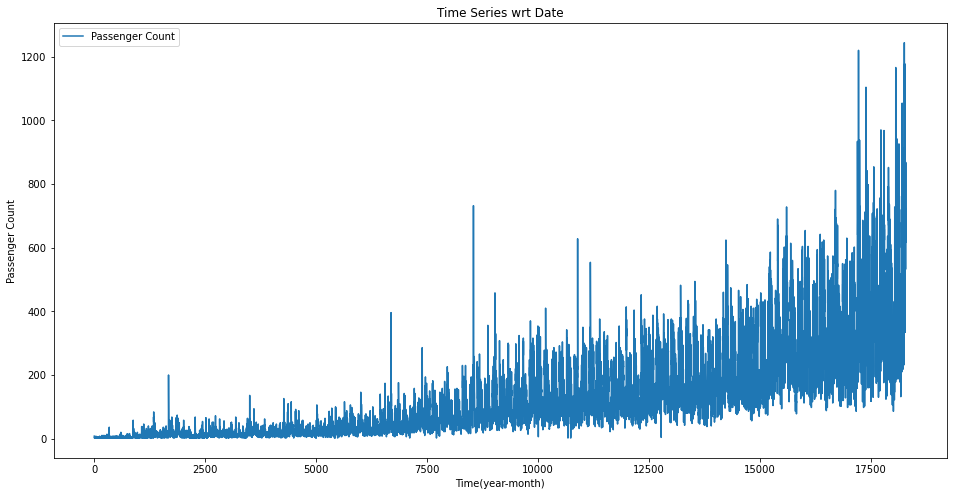

In [56]:
plt.figure(figsize = (16,8))
plt.plot(df['Count'], label = 'Passenger Count')
plt.title('Time Series wrt Date')
plt.xlabel('Time(year-month)')
plt.ylabel('Passenger Count')
plt.legend(loc = 'best')

### Hypothesis 1: Inc with years

<AxesSubplot:xlabel='year'>

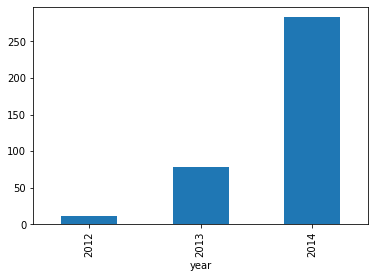

In [57]:
train.groupby('year')['Count'].mean().plot.bar()

Exponential Growth Observed

### Hypothesis 2: Traffic Inc in May to Oct.



<AxesSubplot:xlabel='month'>

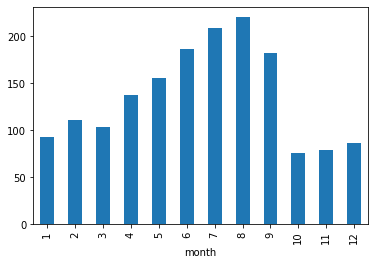

In [58]:
train.groupby('month')['Count'].mean().plot.bar()

InAccurate Hypothesis: Getting more in depth analysis

<AxesSubplot:title={'center':'Passenger Count(Monthwise)'}, xlabel='year,month'>

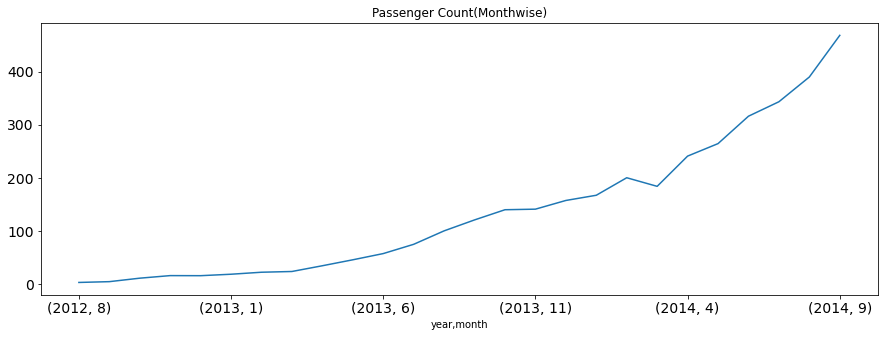

In [59]:
tmp = train.groupby(['year', 'month'])['Count'].mean()
tmp.plot(figsize = (15,5), title = 'Passenger Count(Monthwise)', fontsize = 14)

<AxesSubplot:xlabel='year,month'>

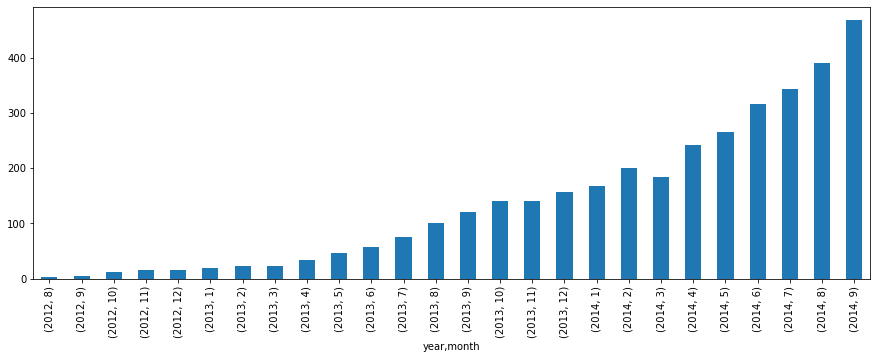

In [60]:
train.groupby(['year', 'month'])['Count'].mean().plot.bar(figsize = (15,5))

Passengers are increaing exponentiall wrt months as well as years

### Hypothesis 3: Trend of traffic due day of week

<AxesSubplot:title={'center':'Date based passenger trends'}, xlabel='day'>

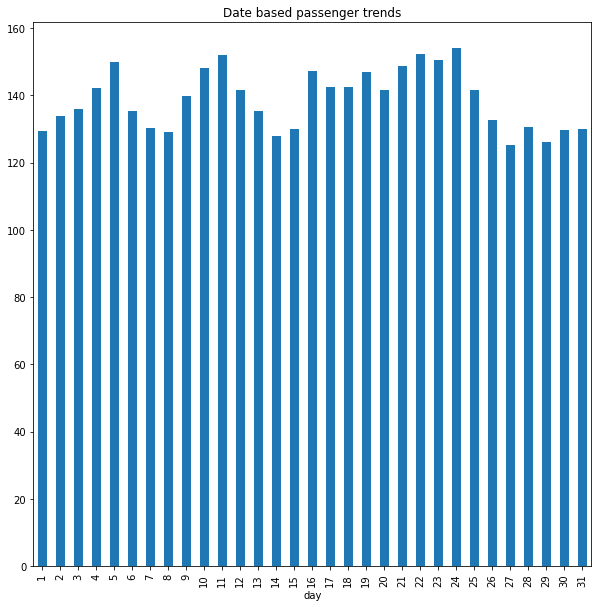

In [65]:
train.groupby('day')['Count'].mean().plot.bar(figsize = (10,10), title = 'Date based passenger trends')

Not much insightful

### Hypothesis 4: Hourly Traffic Analysis

<AxesSubplot:title={'center':'Hourly passenger trends'}, xlabel='Hour'>

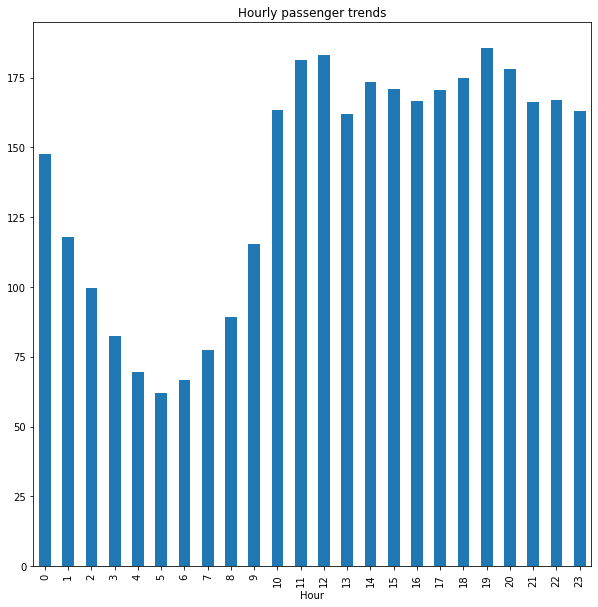

In [66]:
train.groupby('Hour')['Count'].mean().plot.bar(figsize = (10,10), title = 'Hourly passenger trends')

We can see passengers are less during the early hours of the day.


There are peaks at 10 AM and 7 PM relating to the office hours.

### Hypothesis 5: Weekday > Weekend

<AxesSubplot:title={'center':'Weekend passenger trends'}, xlabel='weekend'>

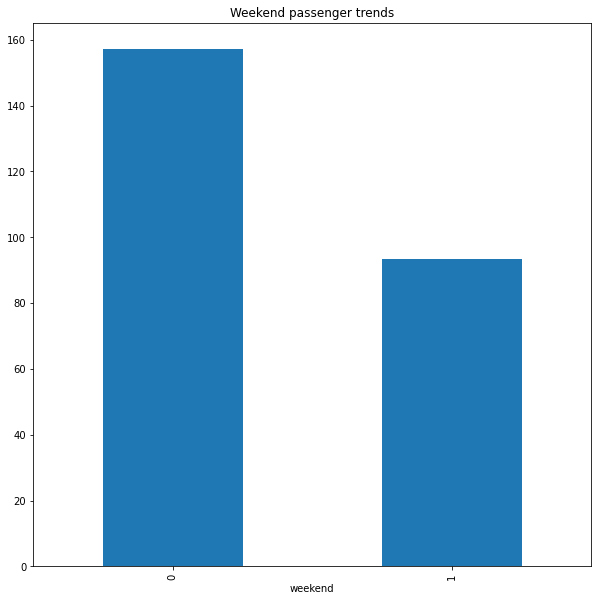

In [68]:
train.groupby('weekend')['Count'].mean().plot.bar(figsize = (10,10), title = 'Weekend passenger trends')

Hypothesis stands Corrected

In [ ]:
train.groupby('weekend')['Count'].mean().plot.bar(figsize = (10,10), title = 'Hourly passenger trends')

### Hypothesis 6: Day of week wise traffic.

<AxesSubplot:title={'center':'Weekday passenger trends'}, xlabel='day of week'>

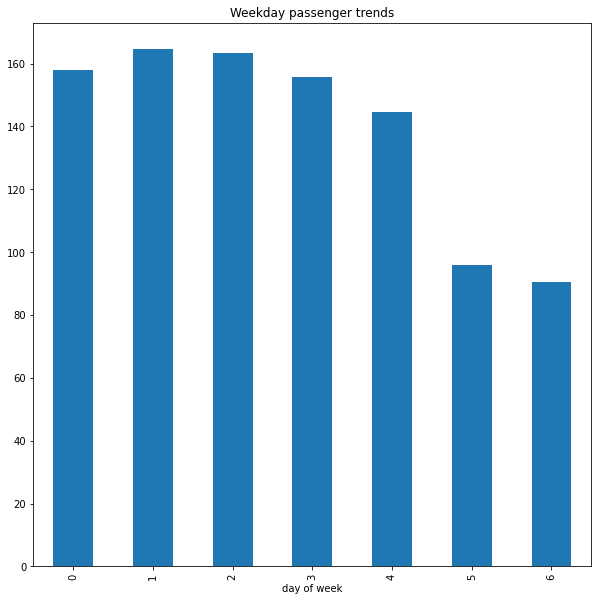

In [71]:
train.groupby('day of week')['Count'].mean().plot.bar(figsize = (10,10), title = 'Weekday passenger trends')

Weekends see lesser traffic

### Counclusion

1. Exponential incerease with years.
2. More traffic during weekdays then weekend.
3. More traffic in 10 AM to 7 PM bracket of the day.

# Data Modelling or EDA

In [72]:
train = train.drop('ID', 1)

In [74]:
train.Timestamp  = pd.to_datetime(train.Datetime, format = '%d-%m-%Y %H:%M')
train.head()

,Datetime,Count,year,month,day,Hour,day of week,weekend
0,2012-08-25 00:00:00,8,2012,8,25,0,5,1
1,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2,2012-08-25 02:00:00,6,2012,8,25,2,5,1
3,2012-08-25 03:00:00,2,2012,8,25,3,5,1
4,2012-08-25 04:00:00,2,2012,8,25,4,5,1


In [75]:
train.index = train.Timestamp

In [76]:
train.head()

,Datetime,Count,year,month,day,Hour,day of week,weekend
Datetime,,,,,,,,
2012-08-25 00:00:00,2012-08-25 00:00:00,8,2012,8,25,0,5,1
2012-08-25 01:00:00,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2012-08-25 02:00:00,2012-08-25 02:00:00,6,2012,8,25,2,5,1
2012-08-25 03:00:00,2012-08-25 03:00:00,2,2012,8,25,3,5,1
2012-08-25 04:00:00,2012-08-25 04:00:00,2,2012,8,25,4,5,1


Data is provided on hourly basis, but lets make it uniform just to be sure.

In [97]:
# Making Hourly time Series.
hourly = train.resample('H').mean()
hourly.shape

(18288, 7)

In [98]:
# Making daily time Series. - This will resample all the data on day level, i.e hours will become avg.
daily = train.resample('D').mean()
daily.shape

(762, 7)

In [100]:
# Making Weekly time Series.
weekly = train.resample('W').mean()
weekly.shape

(110, 7)

In [101]:
# Making Monthly time Series.
monthly = train.resample('M').mean()
monthly.shape

(26, 7)

<AxesSubplot:title={'center':'Monthly'}, xlabel='Datetime'>

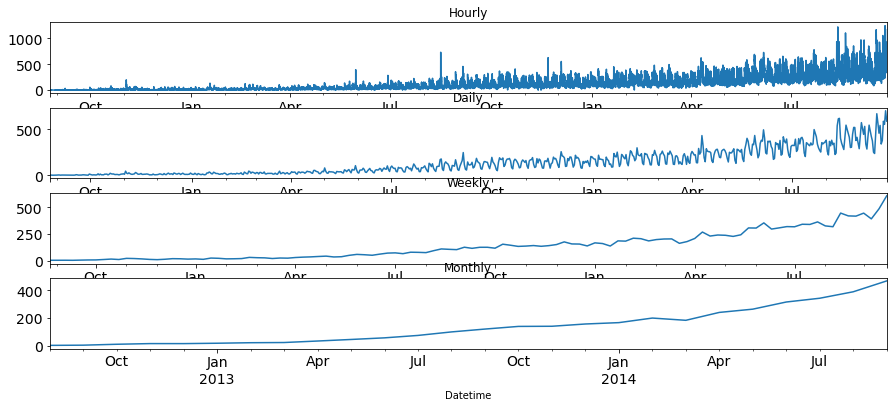

In [113]:
# Plotting Hourly, daily, weekly, monthly plots

fig, axs = plt.subplots(4,1)
hourly.Count.plot(figsize= (15,6), title = 'Hourly', fontsize = 14, ax= axs[0])
daily.Count.plot(figsize= (15,6), title = 'Daily', fontsize = 14, ax= axs[1])
weekly.Count.plot(figsize= (15,6), title = 'Weekly', fontsize = 14, ax= axs[2])
monthly.Count.plot(figsize= (15,6), title = 'Monthly', fontsize = 14, ax= axs[3])

It will become hectic to convert monthly predictions to hourly, so we will work with day level aggragated series

In [121]:
test_orignal.head()

,ID,Datetime,year,month,day,Hour
0,18288,2014-09-26 00:00:00,2014,9,26,0
1,18289,2014-09-26 01:00:00,2014,9,26,1
2,18290,2014-09-26 02:00:00,2014,9,26,2
3,18291,2014-09-26 03:00:00,2014,9,26,3
4,18292,2014-09-26 04:00:00,2014,9,26,4


In [122]:
test.Timestamp = pd.to_datetime(test.Datetime, format = "%d-%m-%Y %H:%M")
test.index = test.Timestamp

In [123]:
# Converting test data to day level
test = test.resample('D').mean()
test.head()

,ID,year,month,day,Hour
Datetime,,,,,
2014-09-26,18299.5,2014.0,9.0,26.0,11.5
2014-09-27,18323.5,2014.0,9.0,27.0,11.5
2014-09-28,18347.5,2014.0,9.0,28.0,11.5
2014-09-29,18371.5,2014.0,9.0,29.0,11.5
2014-09-30,18395.5,2014.0,9.0,30.0,11.5
